In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
x_l = np.load("X.npy") # image
y_l = np.load("Y.npy") # label

In [3]:
x_l = x_l.reshape(x_l.shape[0],-1)
y_l = y_l.reshape(y_l.shape[0],-1)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


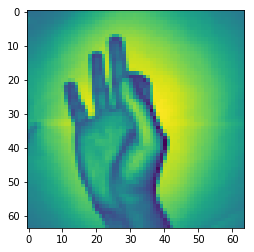

In [4]:
plt.imshow(x_l[0].reshape(64,64))
print(y_l[0])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_l, y_l, test_size=0.3, random_state=41)

## plot sigmoid

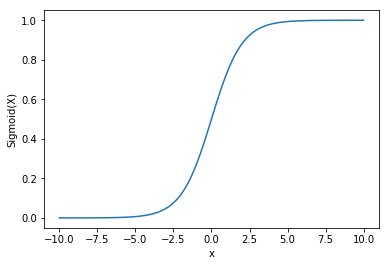

In [6]:
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show()

## This is used for binary classication. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.

 - For multilabel problem there are two approaches 
   - One versus all
   - One versus One
 - One versus all
   1. Here we will be making 10 different models.
   2. Each model is used to differentiate between one class and rest all the classes
   3. The model which gives the highest probability is the predicted class
 - One versus one
   1. Here we will be making a model for combination of every 2 classes.
   2. For prediction each mosel will cast a vote to a label.
   3. Label with highest votes is the predicted label.
 

## one vrs all approach
 - Need to train 10 diff models. One for each class vrs rest of all
 - For prediction we select the model for which we got the highest probability

In [56]:
class logisticRegStochastic:
    def __init__(self,X_train,y_label,lr=0.5):
        self.X_train = np.copy(X_train)
        self.y_label = np.copy(y_label)
        self.lr = lr
        #temp = list(zip(self.X_train, self.y_label)) 
        #random.shuffle(temp) 
        #self.X_train, self.y_label = zip(*temp) 
    def predict(self,inputX):
        inputX = np.insert(inputX,0,1)
        predict = np.sum(np.multiply(inputX,self.weights,dtype=np.float))
        if (-1 * predict) > np.log(np.finfo(type(predict)).max):
            return 0.0  
        return 1/(1+np.exp(-predict))
    def plotSigmoid(self):
        pass
    def getY(self,inputX):
        inputX = np.insert(inputX,0,1)
        print("input : ",inputX)
        print("weights :",self.weights)
        return np.sum(np.multiply(inputX,self.weights,dtype=np.float))
    def getCost(self):
        epsilon = 1e-5  
        cost = 0
        for i in range(self.X_train.shape[0]):
            pred = np.sum(np.multiply(self.X_train[i],self.weights,dtype=np.float64))
            p = 1/(1+np.exp(-pred))
            cost +=  (self.y_label[i]*np.log(p + epsilon) + (1-self.y_label[i])*np.log(1-p+epsilon))
        return (-1*cost/self.X_train.shape[0])
    def train(self):
        #should train and save the weights after gradient descent
        self.X_train = np.insert(self.X_train,0,1,axis=1) # inserting a 1 for const
        self.weights = np.ones(self.X_train.shape[1]) #initialized weights with all zeros
        prevCost = float('inf')
        for _ in range(2000): #number of epochs is 1
            for i in range(self.X_train.shape[0]):
                pred = np.sum(np.multiply(self.X_train[i],self.weights,dtype=np.float64))
                sigmoid_out = 1/(1+np.exp(-pred))
                error = (self.lr/self.X_train.shape[0])*(sigmoid_out-self.y_label[i]) #has the error
                self.weights = np.subtract(self.weights,np.multiply(error,self.X_train[i]))
            #currCost = self.getCost()
            #print("cost is : ",currCost," epoch is ",_)
            #if(currCost>prevCost):
            #    print("Cost increased change leraning rate")
            #    break
            #prevCost = currCost
            
        print("final cost is : ",self.getCost())

In [177]:
def makeBinaryLabels(y_train,currLabel):
    ans = []
    for l in y_train:
        if tuple(l)==tuple(currLabel):
            ans.append(1)
        else:
            ans.append(0)
    return ans

In [178]:
models = []
for i in range(10):
    currLabel = np.zeros(10)
    currLabel[i] = 1
    y_currBinaryLabels = makeBinaryLabels(y_train,currLabel)
    model = logisticRegStochastic(X_train,y_currBinaryLabels)
    print("training model : ",i)
    model.train()
    models.append(model)

training model :  0
final cost is :  0.01027542470564023
training model :  1
final cost is :  0.006250381502335519
training model :  2
final cost is :  0.053518117034527586
training model :  3
final cost is :  0.037497469096472814
training model :  4
final cost is :  0.00982716321667203
training model :  5
final cost is :  0.042401882296013715
training model :  6
final cost is :  0.059252285029097115
training model :  7
final cost is :  0.01769117154441056
training model :  8
final cost is :  0.05875708357979413
training model :  9
final cost is :  0.01490016038146694


In [180]:
for i in range(len(models)):
    print("prob of number ",i+1," is :",models[i].predict(X_test[11]))

prob of number  1  is : 0.016929205648676286
prob of number  2  is : 4.081128478813639e-06
prob of number  3  is : 7.190954274038441e-06
prob of number  4  is : 4.6788871160470235e-06
prob of number  5  is : 1.0754425759651202e-08
prob of number  6  is : 3.3443437644960106e-05
prob of number  7  is : 6.680291504813575e-05
prob of number  8  is : 0.06908245563542245
prob of number  9  is : 4.5666822989621445e-06
prob of number  10  is : 0.8891274932214427


In [168]:
y_test[11]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [184]:
import pickle
for i in range(10):
    filename = "model"+str(i)
    filehandler = open(filename, 'wb') 
    pickle.dump(models[i], filehandler)

In [9]:
import pickle
models = []
for i in range(10):
    filename = "model"+str(i)
    filehandler = open(filename, 'rb')
    models.append(pickle.load(filehandler))

In [10]:
pred = np.zeros(X_test.shape[0])
for i in range(X_test.shape[0]):
    prob = np.zeros(len(models))
    for j in range(len(models)):
        prob[j] = models[j].predict(X_test[i])
    pred[i] = np.argmax(prob) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


In [50]:
countCorr = 0
predictions = []
for i in range(y_test.shape[0]):
    currLabel = np.zeros(10)
    currLabel[int(pred[i])] = 1
    predictions.append(currLabel)
    if tuple(y_test[i])==tuple(currLabel):
        countCorr += 1

In [51]:
accuracy_ova = (countCorr/y_test.shape[0]) * 100
print(accuracy_ova)

74.1518578352181


In [54]:
from sklearn.metrics import confusion_matrix
y_test_label = [np.argmax(p) for p in y_test]
predictions_label = [np.argmax(p) for p in predictions]
print("Confusion matrix is as follows")
confusion_matrix(y_test_label,predictions_label)

Confusion matrix is as follows


array([[42,  2,  1,  1,  0,  6,  0,  2,  0,  0],
       [ 0, 49,  0,  2,  2,  1,  0,  0,  1,  0],
       [ 0,  1, 38,  1,  2,  6,  9,  0,  6,  0],
       [ 0,  0,  2, 38,  0,  3,  5,  0, 12,  0],
       [ 0,  5,  2,  0, 43,  6,  2,  1,  2,  0],
       [ 1,  0,  2,  3,  0, 43,  0,  0,  2,  0],
       [ 0,  3,  2,  8,  0,  9, 36,  0,  3,  3],
       [ 1,  0,  2,  0,  1,  0,  0, 64,  1,  4],
       [ 0,  1,  3,  8,  2,  1,  0,  4, 53,  0],
       [ 4,  1,  0,  0,  0,  3,  1,  4,  0, 53]], dtype=int64)

## one vrs one approach
 - Split the datasets into 10. One for each model.
 - make nc2 models between each of the two classes

In [57]:
dataSets = [None]*10
for i in range(10):
    currLabel = np.zeros(10)
    currLabel[i] = 1
    indicies = [tuple(var)==tuple(currLabel) for var in y_train]
    dataSets[i] = X_train[indicies]

In [61]:
def oneVrsOnePred(models,inputVec):
    count = np.zeros(10)
    for i in range(len(models)):
        for j in range(0,len(models[i])):
            currModel = models[i][j]
            #print(currModel.weights)
            pred = currModel.predict(inputVec)
            #print("prediction for model",i,j, " is : ",pred)
            if(pred >=0.5):
                count[i+j+1] += 1
            else:
                count[i] += 1
            #print(count)
    return np.argmax(count)

In [155]:
import copy
oneVsoneModels = [[] for i in range(9)]
for i in range(10): #10
    for j in range(i+1,10): #10
        #the lower number will have 0 as label (i--> 0 and j-->1)
        print("training model between ",i," and ",j)
        currDataSet = np.concatenate((dataSets[i],dataSets[j]),axis=0)
        ilabels = np.zeros(dataSets[i].shape[0])
        jlabels = np.ones(dataSets[j].shape[0])
        labels = np.concatenate((ilabels,jlabels))
        model = logisticRegStochastic(currDataSet,labels)
        model.train()
        oneVsoneModels[i].append(model)
        #oneVsoneModels[i][j] = copy.deepcopy(model)

training model between  0  and  1
final cost is :  0.000750998145849007
training model between  0  and  2
final cost is :  0.0010850358050380428
training model between  0  and  3
final cost is :  0.001101684010769463
training model between  0  and  4
final cost is :  0.0008374446490015656
training model between  0  and  5
final cost is :  0.003804603322739936
training model between  0  and  6
final cost is :  0.002670446569023495
training model between  0  and  7
final cost is :  0.0015292294466259762
training model between  0  and  8
final cost is :  0.0008029403707601799
training model between  0  and  9
final cost is :  0.0021912524620854453
training model between  1  and  2
final cost is :  0.0016482416085989483
training model between  1  and  3
final cost is :  0.002372732828780254
training model between  1  and  4
final cost is :  0.0008352586926264738
training model between  1  and  5
final cost is :  0.001578429015246258
training model between  1  and  6
final cost is :  0.0031

In [157]:
import pickle
for i in range(len(oneVsoneModels)):
    for j in range(0,len(oneVsoneModels[i])):
        currModel = oneVsoneModels[i][j]
        filename = "model_ovo"+str(i)+"_"+str(j)
        filehandler = open(filename, 'wb') 
        pickle.dump(oneVsoneModels[i][j], filehandler)

In [215]:
correctCount = 0
for i in range(X_test.shape[0]):
    pred = oneVrsOnePred(oneVsoneModels,X_test[i])
    print(i," pred : ",pred," Actual : ",np.argmax(y_test[i]))
    if (pred== np.argmax(y_test[i])):
        correctCount += 1
print("correct count : ",correctCount," total : ",X_test.shape[0])

0  pred :  5  Actual :  5
1  pred :  9  Actual :  9
2  pred :  2  Actual :  2
3  pred :  6  Actual :  4
4  pred :  1  Actual :  2
5  pred :  7  Actual :  7
6  pred :  7  Actual :  7
7  pred :  7  Actual :  7
8  pred :  4  Actual :  4
9  pred :  9  Actual :  9
10  pred :  7  Actual :  7
11  pred :  9  Actual :  9
12  pred :  8  Actual :  8
13  pred :  4  Actual :  4
14  pred :  6  Actual :  6
15  pred :  1  Actual :  1
16  pred :  7  Actual :  7
17  pred :  0  Actual :  0
18  pred :  8  Actual :  8
19  pred :  1  Actual :  1
20  pred :  3  Actual :  3
21  pred :  9  Actual :  9
22  pred :  1  Actual :  1
23  pred :  1  Actual :  1
24  pred :  1  Actual :  3
25  pred :  0  Actual :  7
26  pred :  3  Actual :  3
27  pred :  7  Actual :  7
28  pred :  5  Actual :  5
29  pred :  8  Actual :  6
30  pred :  1  Actual :  1
31  pred :  1  Actual :  1
32  pred :  8  Actual :  8
33  pred :  9  Actual :  6
34  pred :  7  Actual :  7
35  pred :  7  Actual :  7
36  pred :  3  Actual :  6
37  pred : 

319  pred :  6  Actual :  6
320  pred :  5  Actual :  5
321  pred :  3  Actual :  3
322  pred :  2  Actual :  2
323  pred :  5  Actual :  5
324  pred :  0  Actual :  9
325  pred :  9  Actual :  9
326  pred :  1  Actual :  1
327  pred :  8  Actual :  8
328  pred :  3  Actual :  3
329  pred :  8  Actual :  8
330  pred :  8  Actual :  8
331  pred :  2  Actual :  2
332  pred :  0  Actual :  0
333  pred :  7  Actual :  7
334  pred :  6  Actual :  6
335  pred :  6  Actual :  6
336  pred :  0  Actual :  0
337  pred :  5  Actual :  5
338  pred :  3  Actual :  8
339  pred :  8  Actual :  8
340  pred :  6  Actual :  6
341  pred :  0  Actual :  0
342  pred :  0  Actual :  0
343  pred :  9  Actual :  9
344  pred :  7  Actual :  7
345  pred :  4  Actual :  4
346  pred :  0  Actual :  0
347  pred :  9  Actual :  9
348  pred :  7  Actual :  7
349  pred :  8  Actual :  8
350  pred :  2  Actual :  2
351  pred :  7  Actual :  7
352  pred :  9  Actual :  9
353  pred :  0  Actual :  7
354  pred :  4  Actu

In [65]:
correctCount = 0
for i in range(X_test.shape[0]):
    pred = oneVrsOnePred(oneVsoneModels,X_test[i])
    print(i," pred : ",pred," Actual : ",np.argmax(y_test[i]))
    if (pred== np.argmax(y_test[i])):
        correctCount += 1
print("correct count : ",correctCount," total : ",X_test.shape[0])

0  pred :  0  Actual :  5
1  pred :  0  Actual :  9
2  pred :  0  Actual :  2
3  pred :  0  Actual :  4
4  pred :  0  Actual :  2
5  pred :  0  Actual :  7
6  pred :  0  Actual :  7
7  pred :  0  Actual :  7
8  pred :  0  Actual :  4
9  pred :  0  Actual :  9
10  pred :  0  Actual :  7
11  pred :  0  Actual :  9
12  pred :  0  Actual :  8
13  pred :  0  Actual :  4
14  pred :  0  Actual :  6
15  pred :  0  Actual :  1
16  pred :  0  Actual :  7
17  pred :  0  Actual :  0
18  pred :  0  Actual :  8
19  pred :  0  Actual :  1
20  pred :  0  Actual :  3
21  pred :  0  Actual :  9
22  pred :  0  Actual :  1
23  pred :  0  Actual :  1
24  pred :  0  Actual :  3
25  pred :  0  Actual :  7
26  pred :  0  Actual :  3
27  pred :  0  Actual :  7
28  pred :  0  Actual :  5
29  pred :  0  Actual :  6
30  pred :  0  Actual :  1
31  pred :  0  Actual :  1
32  pred :  0  Actual :  8
33  pred :  0  Actual :  6
34  pred :  0  Actual :  7
35  pred :  0  Actual :  7
36  pred :  0  Actual :  6
37  pred : 

355  pred :  0  Actual :  0
356  pred :  0  Actual :  7
357  pred :  0  Actual :  4
358  pred :  0  Actual :  6
359  pred :  0  Actual :  6
360  pred :  0  Actual :  9
361  pred :  0  Actual :  6
362  pred :  0  Actual :  9
363  pred :  0  Actual :  2
364  pred :  0  Actual :  1
365  pred :  0  Actual :  0
366  pred :  0  Actual :  4
367  pred :  0  Actual :  8
368  pred :  0  Actual :  7
369  pred :  0  Actual :  9
370  pred :  0  Actual :  2
371  pred :  0  Actual :  1
372  pred :  0  Actual :  6
373  pred :  0  Actual :  6
374  pred :  0  Actual :  4
375  pred :  0  Actual :  2
376  pred :  0  Actual :  9
377  pred :  0  Actual :  4
378  pred :  0  Actual :  1
379  pred :  0  Actual :  1
380  pred :  0  Actual :  2
381  pred :  0  Actual :  8
382  pred :  0  Actual :  0
383  pred :  0  Actual :  8
384  pred :  0  Actual :  3
385  pred :  0  Actual :  8
386  pred :  0  Actual :  6
387  pred :  0  Actual :  2
388  pred :  0  Actual :  8
389  pred :  0  Actual :  2
390  pred :  0  Actu

In [201]:
accuracy_ovo = (correctCount/X_test.shape[0])*100
print(accuracy_ovo)

74.1518578352181


## Using sklearn library and comparing

In [66]:
y_labels = []
for l in y_train:
    y_labels.append(np.argmax(l))
y_labels = np.array(y_labels)

In [67]:
y_test_labels = []
for l in y_test:
    y_test_labels.append(np.argmax(l))
y_test_labels = np.array(y_test_labels)

In [68]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='ovr').fit(X_train, y_labels)

In [69]:
pred_lib = clf.predict(X_test)

In [70]:
noOfCorrectPred=np.sum([pred_lib == y_test_labels])

In [205]:
accuracy_lib = (noOfCorrectPred/X_test.shape[0])*100

In [206]:
from prettytable import PrettyTable
t = PrettyTable(['error type','one vrs all', 'one vrs one','library'])
t.add_row(['accuracy', accuracy_ova,accuracy_ovo,accuracy_lib])
print(t)

+------------+------------------+-------------------+-------------------+
| error type |   one vrs all    |    one vrs one    |      library      |
+------------+------------------+-------------------+-------------------+
|  accuracy  | 74.1518578352181 | 76.41357027463651 | 73.99030694668821 |
+------------+------------------+-------------------+-------------------+


## Display few pictures with their predicted and original labels
 - Using one vrs one models  for this part (because of highest accuracy)

pred :  4  Actual :  4


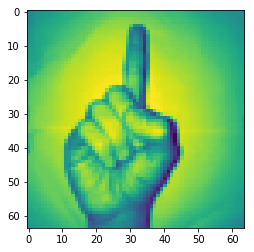

In [209]:
randomIndex = 101
pred = oneVrsOnePred(oneVsoneModels,X_test[randomIndex])
print("pred : ",pred," Actual : ",np.argmax(y_test[randomIndex]))
plt.imshow(X_test[randomIndex].reshape(64,64))

pred :  1  Actual :  2


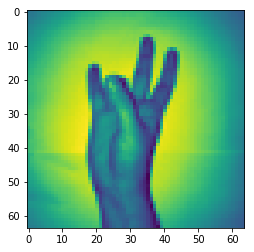

In [214]:
randomIndex = 4
pred = oneVrsOnePred(oneVsoneModels,X_test[randomIndex])
print("pred : ",pred," Actual : ",np.argmax(y_test[randomIndex]))
plt.imshow(X_test[randomIndex].reshape(64,64))

pred :  1  Actual :  3


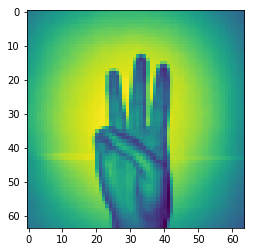

In [216]:
randomIndex = 24
pred = oneVrsOnePred(oneVsoneModels,X_test[randomIndex])
print("pred : ",pred," Actual : ",np.argmax(y_test[randomIndex]))
plt.imshow(X_test[randomIndex].reshape(64,64))

pred :  1  Actual :  1


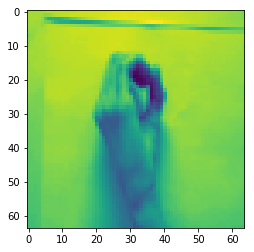

In [217]:
randomIndex = 22
pred = oneVrsOnePred(oneVsoneModels,X_test[randomIndex])
print("pred : ",pred," Actual : ",np.argmax(y_test[randomIndex]))
plt.imshow(X_test[randomIndex].reshape(64,64))

Do the results differ? State the reasons why it is so.

Ans: The results between ovr and ovo differ.
     From the above accuracy ovo is better than ovr.
     this is because in ovo we are having 45 models whereas in ovr we use 10 models